In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

class0 = np.random.randn(170, 2) + np.array([-3, -3])
class1 = np.random.randn(170, 2) + np.array([3, 0])
class2 = np.random.randn(160, 2) + np.array([0, 3])

X = np.vstack((class0, class1, class2))
Y_labels = np.array([0]*170 + [1]*170 + [2]*160)


Y = np.zeros((500, 3))
for i in range(500):
    Y[i, Y_labels[i]] = 1

print(X.shape)
print(Y.shape)


(500, 2)
(500, 3)


In [2]:
class NeuralNetwork(object):
    def __init__(self):
        inputNeurons = 2
        h1 = 10
        h2 = 8
        h3 = 6
        outputNeurons = 3

        self.learning_rate = 0.05

        self.W_H1 = np.random.randn(inputNeurons, h1)
        self.W_H2 = np.random.randn(h1, h2)
        self.W_H3 = np.random.randn(h2, h3)
        self.W_O  = np.random.randn(h3, outputNeurons)

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def feedForward(self, X):
        h1_in = np.dot(X, self.W_H1)
        self.h1_out = self.sigmoid(h1_in)

        h2_in = np.dot(self.h1_out, self.W_H2)
        self.h2_out = self.sigmoid(h2_in)

        h3_in = np.dot(self.h2_out, self.W_H3)
        self.h3_out = self.sigmoid(h3_in)

        out_in = np.dot(self.h3_out, self.W_O)
        pred = self.softmax(out_in)

        return pred

    def backPropagation(self, X, Y, pred):

        output_delta = self.learning_rate * (Y - pred)

        h3_error = output_delta.dot(self.W_O.T)
        h3_delta = self.learning_rate * h3_error * self.sigmoid(self.h3_out, der=True)

        h2_error = h3_delta.dot(self.W_H3.T)
        h2_delta = self.learning_rate * h2_error * self.sigmoid(self.h2_out, der=True)

        h1_error = h2_delta.dot(self.W_H2.T)
        h1_delta = self.learning_rate * h1_error * self.sigmoid(self.h1_out, der=True)

        self.W_O  += self.h3_out.T.dot(output_delta)
        self.W_H3 += self.h2_out.T.dot(h3_delta)
        self.W_H2 += self.h1_out.T.dot(h2_delta)
        self.W_H1 += X.T.dot(h1_delta)

    def train(self, X, Y):
        pred = self.feedForward(X)
        self.backPropagation(X, Y, pred)


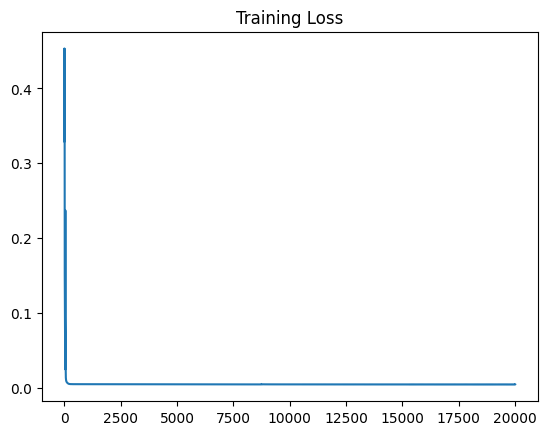

In [3]:
NN = NeuralNetwork()

err = []

for i in range(20000):
    pred = NN.feedForward(X)
    NN.train(X, Y)
    loss = np.mean(np.square(Y - pred))
    err.append(loss)

plt.plot(err)
plt.title("Training Loss")
plt.show()


In [4]:
idx = np.random.choice(500, 5, replace=False)
sample = X[idx]
pred = NN.feedForward(sample)

print("Predicted Probabilities:\n", pred)
print("Predicted Classes:", np.argmax(pred, axis=1))
print("True Classes:", Y_labels[idx])


Predicted Probabilities:
 [[9.99999914e-01 2.14169804e-08 6.50246044e-08]
 [3.84233261e-11 9.99450485e-01 5.49515051e-04]
 [9.99993739e-01 6.24738820e-06 1.36525059e-08]
 [8.41289102e-17 1.94110224e-06 9.99998059e-01]
 [9.99999899e-01 5.57295930e-08 4.55892295e-08]]
Predicted Classes: [0 1 0 2 0]
True Classes: [0 1 0 2 0]
